## Community detection exmaple 

This is an example code for community detection lecture from

https://www.meetup.com/PyData-Tel-Aviv/events/279804087/  

### Imports

In [1]:
import pickle
import en_core_web_sm
import networkx as nx

from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

from collections import defaultdict
import community as community_louvain
import matplotlib.cm as cm

### Load data and build graph

In [6]:
def build_graph():
    with open('npr_coronavirus.txt', 'rb') as fp:   # Unpickling
        corpus = pickle.load(fp)

    nlp = en_core_web_sm.load()

    entities = []
    for article in corpus[:50]:
        tokens = nlp(''.join(article))
        gpe_list = []
        for ent in tokens.ents:
            if ent.label_ == 'GPE':
                gpe_list.append(ent.text)
        entities.append(gpe_list)


    articles = []
    for entity_list in entities:
        cleaned_entity_list = []
        for entity in entity_list:
            cleaned_entity_list.append(entity.lstrip('the ').replace("'s", "").replace("’s",""))
        articles.append(cleaned_entity_list)


    articles = [article for article in articles if article != []]

    G = nx.Graph()

    for entities in articles:
        G.add_nodes_from(entities)

    for entities in articles:
        if len(entities) > 1:
            for i in range(len(entities)-1):
               G.add_edges_from([(str(entities[i]),str(entities[i+1]))])

    figure(figsize=(10, 8))
    nx.draw(G, node_size=15)
    plt.show()

    return G

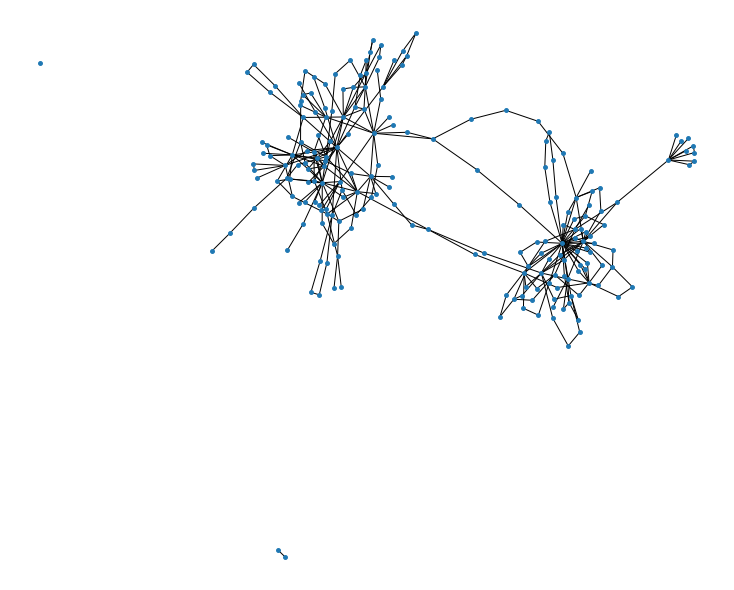

In [7]:
g = build_graph()

### Find and visualize the communities

In [8]:
def find_communities(g):
    partition = community_louvain.best_partition(g)
    return partition

In [9]:
partitions = find_communities(g)

In [10]:
def draw_graph(G, partition,):
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
#     figure(figsize=(200, 10))
    plt.show()

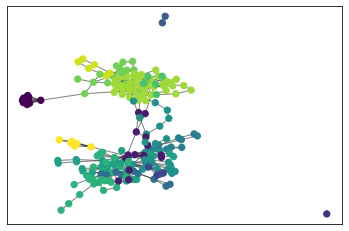

In [11]:
draw_graph(g, partitions)